In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order = pd.read_csv('combined_order.csv')
order.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [3]:
order = order.iloc[:, 1:]

In [4]:
order[order["order_id"]==2]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
4304,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
4305,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
35308,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
37232,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
39528,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
42503,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
43492,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
46242,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits


In [5]:
cust_prod = pd.crosstab(order['user_id'], order['aisle'])
cust_prod

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206201,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# orders aggregation of each user
summ = cust_prod.sum(axis = 1)
summ

user_id
7         11
13         5
23         9
27        13
36         3
          ..
206187    14
206201    17
206206     4
206207     8
206208    16
Length: 25831, dtype: int64

In [7]:
# to know how many users ordered zero products
(summ == 0).sum()

0

scale data

In [8]:
df = (cust_prod.T/summ.values).T

In [9]:
df_s = df.sample(10_000)
df_s

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
41059,0.0,0.076923,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.153846,0.0,0.000000
91771,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
165714,0.0,0.250000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
65519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000
92910,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113579,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1793,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.000000,0.076923,0.000000,0.0,0.0,0.0,0.000000,0.0,0.076923
88541,0.0,0.000000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.125000,0.0,0.000000


In [10]:
# usnig elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
# List of Within Class Sum of Square
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=40)
    kmeans.fit(df_s)
    # inertia method returns wcss for the model
    wcss.append(kmeans.inertia_)


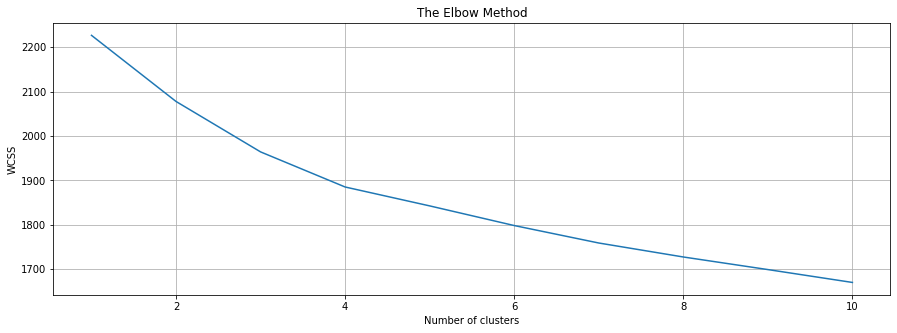

In [11]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11), wcss)
# sns.lineplot(range=(1,11), marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid('True')
plt.show()

Clustering

In [12]:
data = df_s
km = KMeans(n_clusters = 5, init= 'k-means++',max_iter = 300, random_state = 1, n_init = 10, tol = 1e-04)
# get the label of each row to identify to which cluster it is related to
y_km = km.fit_predict(data)

In [13]:
from sklearn import metrics
metrics.silhouette_score(data, y_km, metric='euclidean')

0.05236976210978175

In [43]:
distortions = []
silhouette_score = []
data = df_s
for i in range(2,10):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1)
    label = km.fit_predict(data)
    print(label)
    distortions.append(km.inertia_)
    sc = metrics.silhouette_score(data, label)
    silhouette_score.append(sc)

[1 1 0 ... 1 1 0]
[2 2 0 ... 2 2 1]
[3 3 2 ... 3 3 1]
[0 0 1 ... 0 0 2]
[3 3 0 ... 3 3 1]
[5 5 3 ... 5 5 2]
[1 1 4 ... 1 1 2]
[3 3 1 ... 3 3 7]


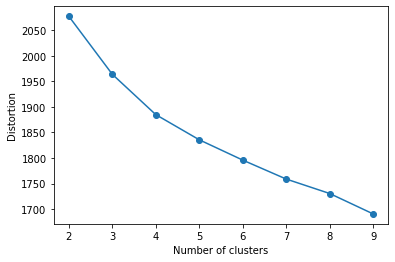

In [45]:
plt.plot(range(2,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

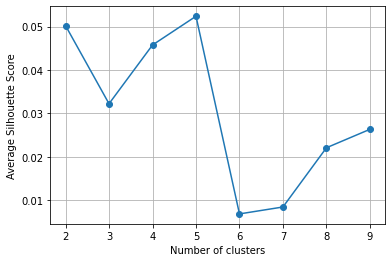

In [47]:
plt.plot(range(2,10), silhouette_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid('True')
plt.show()

In [48]:
##then let's see the performance of clustering
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples


In [64]:
#Notice: here we need to run the k-means with best k again.
kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]


In [55]:
silhouette_vals = silhouette_samples(data, labels, metric='euclidean')


Clusters Visualisation 

(0.0, 0.0, 0.5, 1.0)
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


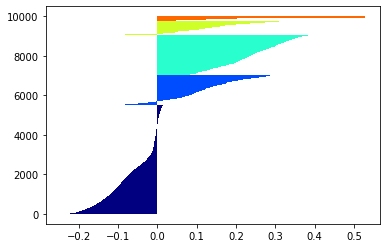

In [74]:
#we already know the averag coefficient, and here we'd like to see the details with the best k.
silhouette_vals = silhouette_samples(data, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

PCA and Clustering

In [83]:
# use PCA to reduce the number of variables, thus reducing the complexity of our model
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
df_pca = pca.fit_transform(df)
ratio = pca.explained_variance_ratio_

# decide how many components we should choose
# here we choose 10 
ratio_running = np.array(ratio.cumsum())
ratio_running

array([0.10445512, 0.1949566 , 0.24891813, 0.29323324, 0.33336167,
       0.36621044, 0.39505425, 0.41916585, 0.44086312, 0.46191673,
       0.4818821 , 0.50111186, 0.51809208, 0.53299055, 0.54718662,
       0.56056825, 0.57351234, 0.58604089, 0.59814102, 0.61014072,
       0.62175063, 0.63328141, 0.64465748, 0.65584263, 0.66685784,
       0.67696735, 0.68701027, 0.69656534, 0.70578405, 0.71474152,
       0.72360055, 0.73208335, 0.74047306, 0.74875179, 0.75666262,
       0.76451774, 0.77199237, 0.77936261, 0.78647735, 0.79350526,
       0.80010006, 0.8063199 , 0.81212579, 0.81771494, 0.82291047,
       0.82787339, 0.83272356, 0.83748346, 0.84197858, 0.8462564 ,
       0.85051697, 0.85470645, 0.85884704, 0.86289139, 0.86681967,
       0.8707138 , 0.8745689 , 0.87837052, 0.88211927, 0.88571216,
       0.88918953, 0.89246263, 0.89559264, 0.89861055, 0.90152875,
       0.90435324, 0.90709298, 0.90980044, 0.91247139, 0.91506141,
       0.91762368, 0.92008249, 0.92252595, 0.92494046, 0.92734

In [108]:
pca = PCA(n_components=.90)
df_pca = pca.fit_transform(df)

In [182]:
from sklearn.cluster import KMeans
data = pd.DataFrame(df_pca)
km = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    max_iter = 300,
    random_state = 1,
    n_init = 10,
)
y_km = km.fit_predict(data)

In [181]:
from sklearn import metrics
metrics.silhouette_score(data, y_km, metric='euclidean')

0.1705616252578758

In [183]:
#use elbow method to find the best n_clusters
distortions_pca = []
silhouette_score_pca = []
for i in range(2, 31):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
    )
    label = km.fit_predict(data)
    distortions_pca.append(km.inertia_)
    sc = metrics.silhouette_score(data, label)
    silhouette_score_pca.append(sc)

<function matplotlib.pyplot.show(close=None, block=None)>

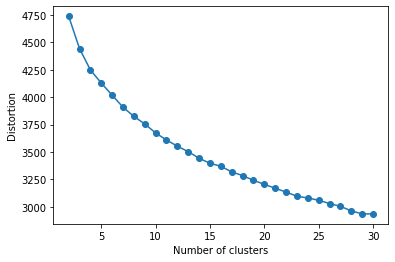

In [184]:
plt.plot(range(2,31), distortions_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

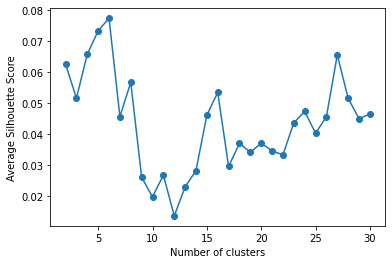

In [185]:
plt.plot(range(2,31), silhouette_score_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [186]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [187]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

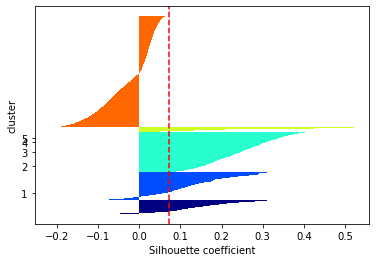

In [188]:
silhouette_vals = silhouette_samples(data, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor = None,
        color = color
    )
    y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhoette_avg = np.mean(silhouette_vals)

plt.axvline(silhoette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [210]:
df['cluster'] = labels


In [219]:
df_c = df.groupby(['cluster']).mean()
df_c


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000105,0.002937,0.000179,0.000223,0.009549,0.000509,0.005322,0.000359,0.000091,0.000947,...,0.008801,0.006127,0.002362,0.003059,0.001037,0.000921,0.000966,0.023545,0.000167,0.299942
1,0.000266,0.002624,0.000129,0.000090,0.005196,0.000420,0.006029,0.000305,0.000168,0.000650,...,0.006856,0.005128,0.002301,0.002394,0.001293,0.000394,0.001137,0.019037,0.000387,0.023739
2,0.000161,0.005974,0.000046,0.000171,0.005041,0.000648,0.007455,0.000304,0.000105,0.000393,...,0.005852,0.003607,0.004978,0.004879,0.000306,0.000524,0.001150,0.016038,0.000204,0.021741
3,0.000260,0.001488,0.000260,0.000000,0.001106,0.002137,0.005664,0.000000,0.000000,0.002466,...,0.005154,0.008184,0.000519,0.002510,0.001849,0.001645,0.000909,0.579874,0.000312,0.008065
4,0.001127,0.005601,0.000349,0.000362,0.011259,0.002492,0.013240,0.000975,0.000307,0.004734,...,0.011383,0.010253,0.003336,0.005787,0.002190,0.001972,0.002276,0.022718,0.002486,0.019914


In [234]:
df_c.loc[1].sort_values(ascending=False).head(10)

aisle
fresh fruits                     0.381116
packaged vegetables fruits       0.060886
fresh vegetables                 0.049772
milk                             0.032325
packaged produce                 0.027102
yogurt                           0.023739
soy lactosefree                  0.019838
packaged cheese                  0.019516
water seltzer sparkling water    0.019037
bread                            0.015866
Name: 1, dtype: float64

In [236]:
for i in np.unique(labels):
    print('----------------------------------------------------------------------------')
    print('The top 10 aisles for cluster {}'.format(i))
    print(df_c.loc[i].sort_values(ascending=False).head(10))


----------------------------------------------------------------------------
The top 10 aisles for cluster 0
aisle
yogurt                           0.299942
fresh fruits                     0.086316
fresh vegetables                 0.039678
milk                             0.038157
packaged vegetables fruits       0.035814
water seltzer sparkling water    0.023545
packaged cheese                  0.023133
soy lactosefree                  0.019909
bread                            0.016770
chips pretzels                   0.016609
Name: 0, dtype: float64
----------------------------------------------------------------------------
The top 10 aisles for cluster 1
aisle
fresh fruits                     0.381116
packaged vegetables fruits       0.060886
fresh vegetables                 0.049772
milk                             0.032325
packaged produce                 0.027102
yogurt                           0.023739
soy lactosefree                  0.019838
packaged cheese                 